In [1]:
import numpy as np
from numpy.linalg import inv, eig, svd
import pandas as pd
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Dataset is from DOW30 DJIA and its stock from Yahoo Finance... Adj Returns from 2000 to 2019

In [4]:
df = pd.read_csv('../data/dow_adjcloses.csv', index_col=0)

In [5]:
df.head(5)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847043,35.476634,3.530576,26.650218,14.560887,21.582046,43.003876,16.983583,23.522220,NaN,...,4.701180,16.746856,32.227726,20.158885,21.319030,5.841355,22.564221,NaN,47.337599,21.713237
2000-01-04,28.661131,34.134275,3.232839,26.610431,14.372251,21.582046,40.577200,17.040950,24.899860,NaN,...,4.445214,16.121738,31.596399,19.890099,20.445803,5.766368,21.833915,NaN,45.566248,20.907354
2000-01-05,30.122175,33.959430,3.280149,28.473758,14.914205,22.049145,40.895453,17.228147,25.781550,NaN,...,4.702157,16.415912,31.325831,20.085579,20.254784,5.753327,22.564221,NaN,44.503437,21.097421
2000-01-06,31.877325,33.959430,2.996290,28.553331,15.459153,22.903343,39.781569,17.210031,24.899860,NaN,...,4.677733,16.972739,32.438168,20.122232,20.998392,5.964159,22.449405,NaN,45.126952,20.527220
2000-01-07,32.509812,34.433913,3.138219,29.382213,15.962182,23.305926,42.128682,18.342270,24.506249,NaN,...,4.677733,18.123166,35.023602,20.922479,21.830687,6.662948,22.282692,NaN,48.535033,21.051805


In [6]:
df.tail(5)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-31,200.30,102.70,166.44,385.62,133.16,114.65,47.29,48.13,111.52,53.81,...,81.88,42.45,96.47,125.54,118.07,270.20,55.06,135.01,95.83,72.26
2019-02-01,199.16,103.06,166.52,387.43,130.91,118.37,47.34,48.70,111.30,53.47,...,81.51,42.88,97.47,126.49,118.98,268.72,54.55,140.15,93.86,71.88
2019-02-04,200.21,103.42,171.25,397.00,130.88,119.74,47.35,49.25,111.80,53.13,...,81.99,42.44,98.03,126.04,119.14,268.21,54.04,141.50,94.77,71.46
2019-02-05,201.12,103.90,174.18,410.18,132.00,119.48,47.26,49.26,112.66,54.26,...,82.86,42.11,97.44,126.18,120.77,266.31,54.14,142.53,95.60,71.31
2019-02-06,202.57,104.96,174.24,411.11,130.54,118.88,47.48,49.26,111.41,53.21,...,82.71,42.33,97.92,125.55,121.36,269.50,53.79,141.49,95.64,71.47


In [7]:
df.shape

(4804, 30)

In [8]:
df.columns

Index(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DWDP',
       'XOM', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT',
       'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'V', 'WMT', 'WBA'],
      dtype='object')

<AxesSubplot:title={'center':'Correlation Matrix'}>

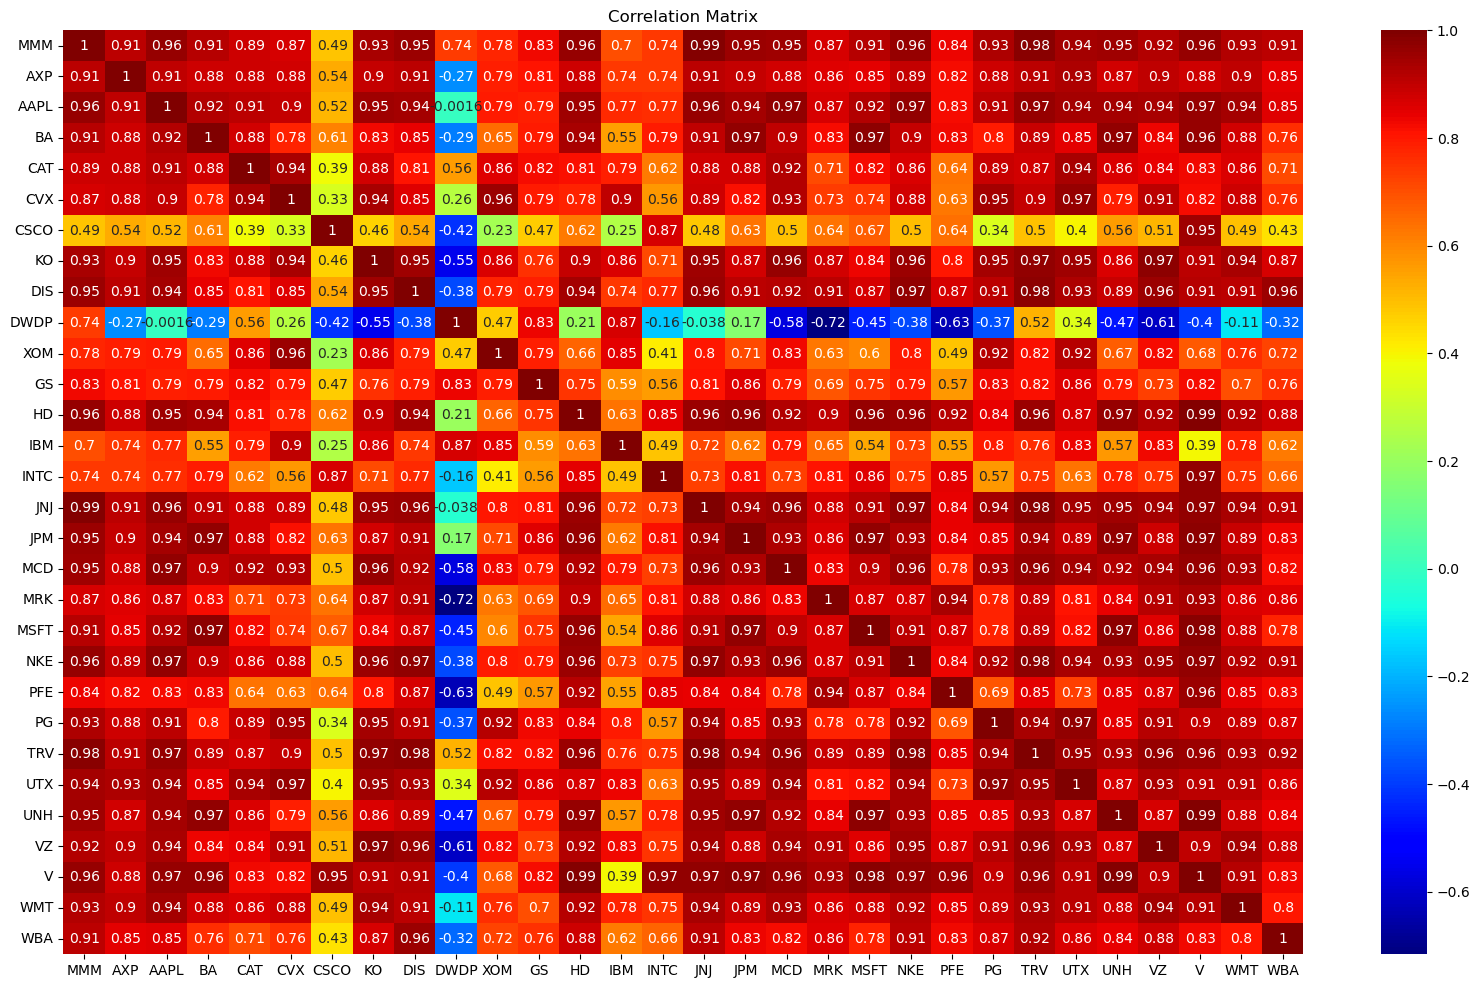

In [9]:
correlation = df.corr()
plt.figure(figsize=(20,12))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, annot=True, cmap='jet')

In [10]:
pd.options.display.width = 100
pd.options.display.max_rows = 500
pd.options.display.precision = 3

In [11]:
df

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,...,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.847,35.477,3.531,26.650,14.561,21.582,43.004,16.984,23.522,NaN,...,4.701,16.747,32.228,20.159,21.319,5.841,22.564,NaN,47.338,21.713
2000-01-04,28.661,34.134,3.233,26.610,14.372,21.582,40.577,17.041,24.900,NaN,...,4.445,16.122,31.596,19.890,20.446,5.766,21.834,NaN,45.566,20.907
2000-01-05,30.122,33.959,3.280,28.474,14.914,22.049,40.895,17.228,25.782,NaN,...,4.702,16.416,31.326,20.086,20.255,5.753,22.564,NaN,44.503,21.097
2000-01-06,31.877,33.959,2.996,28.553,15.459,22.903,39.782,17.210,24.900,NaN,...,4.678,16.973,32.438,20.122,20.998,5.964,22.449,NaN,45.127,20.527
2000-01-07,32.510,34.434,3.138,29.382,15.962,23.306,42.129,18.342,24.506,NaN,...,4.678,18.123,35.024,20.922,21.831,6.663,22.283,NaN,48.535,21.052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31,200.300,102.700,166.440,385.620,133.160,114.650,47.290,48.130,111.520,53.81,...,81.880,42.450,96.470,125.540,118.070,270.200,55.060,135.01,95.830,72.260
2019-02-01,199.160,103.060,166.520,387.430,130.910,118.370,47.340,48.700,111.300,53.47,...,81.510,42.880,97.470,126.490,118.980,268.720,54.550,140.15,93.860,71.880
2019-02-04,200.210,103.420,171.250,397.000,130.880,119.740,47.350,49.250,111.800,53.13,...,81.990,42.440,98.030,126.040,119.140,268.210,54.040,141.50,94.770,71.460


In [12]:
df.isnull().sum()/len(df)*100

MMM      0.000
AXP      0.000
AAPL     0.000
BA       0.000
CAT      0.000
CVX      0.000
CSCO     0.000
KO       0.000
DIS      0.000
DWDP    92.444
XOM      0.000
GS       0.000
HD       0.000
IBM      0.000
INTC     0.000
JNJ      0.000
JPM      0.000
MCD      0.000
MRK      0.000
MSFT     0.000
NKE      0.000
PFE      0.000
PG       0.000
TRV      0.000
UTX      0.000
UNH      0.000
VZ       0.000
V       42.943
WMT      0.000
WBA      0.000
dtype: float64

In [13]:
df = df.drop(['DWDP','V'],axis=1)

In [14]:
df.shape

(4804, 28)

In [15]:
df.isnull().values.any()

False

In [16]:
# df = df.fillna(method='ffill')

In [17]:
df_return = df.pct_change(1) #daily linear return
df_return= df_return[df_return.apply(lambda x :(x-x.mean()).abs()<(3*x.std())).all(1)] #Remove outliers beyond 3 std.

### Transform data

All the variables should be on the same scale before applying PCA... mean=0, variance=1... Standardization

In [18]:
scaler = StandardScaler().fit(df_return)

In [19]:
rs_df = pd.DataFrame(scaler.fit_transform(df_return),columns = df_return.columns, index = df_return.index)
# rescaledDataset = pd.DataFrame(scaler.fit_transform(df_return),columns = df_return.columns, index = df_return.index)
df_return.dropna(how='any', inplace=True)
rs_df.dropna(how='any', inplace=True)
rs_df.head(5)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,...,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-1.713,0.566,-2.708,-1.133,-1.041,-0.787,-1.834,3.569,0.725,0.981,...,-1.936,3.667,-0.173,1.772,-0.936,-1.954,0.076,-0.836,-1.375,2.942
2000-01-20,-3.564,1.077,3.304,-1.670,-2.834,-0.446,0.022,0.987,-2.415,-1.897,...,-0.733,-1.816,-1.421,-2.742,-0.476,-1.916,1.654,0.241,-0.987,-0.036
2000-02-02,-1.687,-1.913,-0.806,1.298,0.311,-0.582,-2.018,-3.228,2.527,0.599,...,-1.570,1.136,-2.313,-1.019,-3.905,0.037,1.739,-0.389,-0.501,0.303
2000-02-03,-0.881,-0.557,2.291,-1.869,-1.689,-1.187,2.023,-2.161,1.213,-1.489,...,2.012,0.632,-0.895,-0.971,-3.592,-1.288,-0.684,-1.289,-0.020,-0.191
2000-02-04,-2.758,-0.643,2.284,0.809,-0.053,-2.840,1.649,1.882,0.451,-1.587,...,2.049,-1.904,0.260,-3.521,0.316,-2.466,1.621,0.149,-3.250,0.770


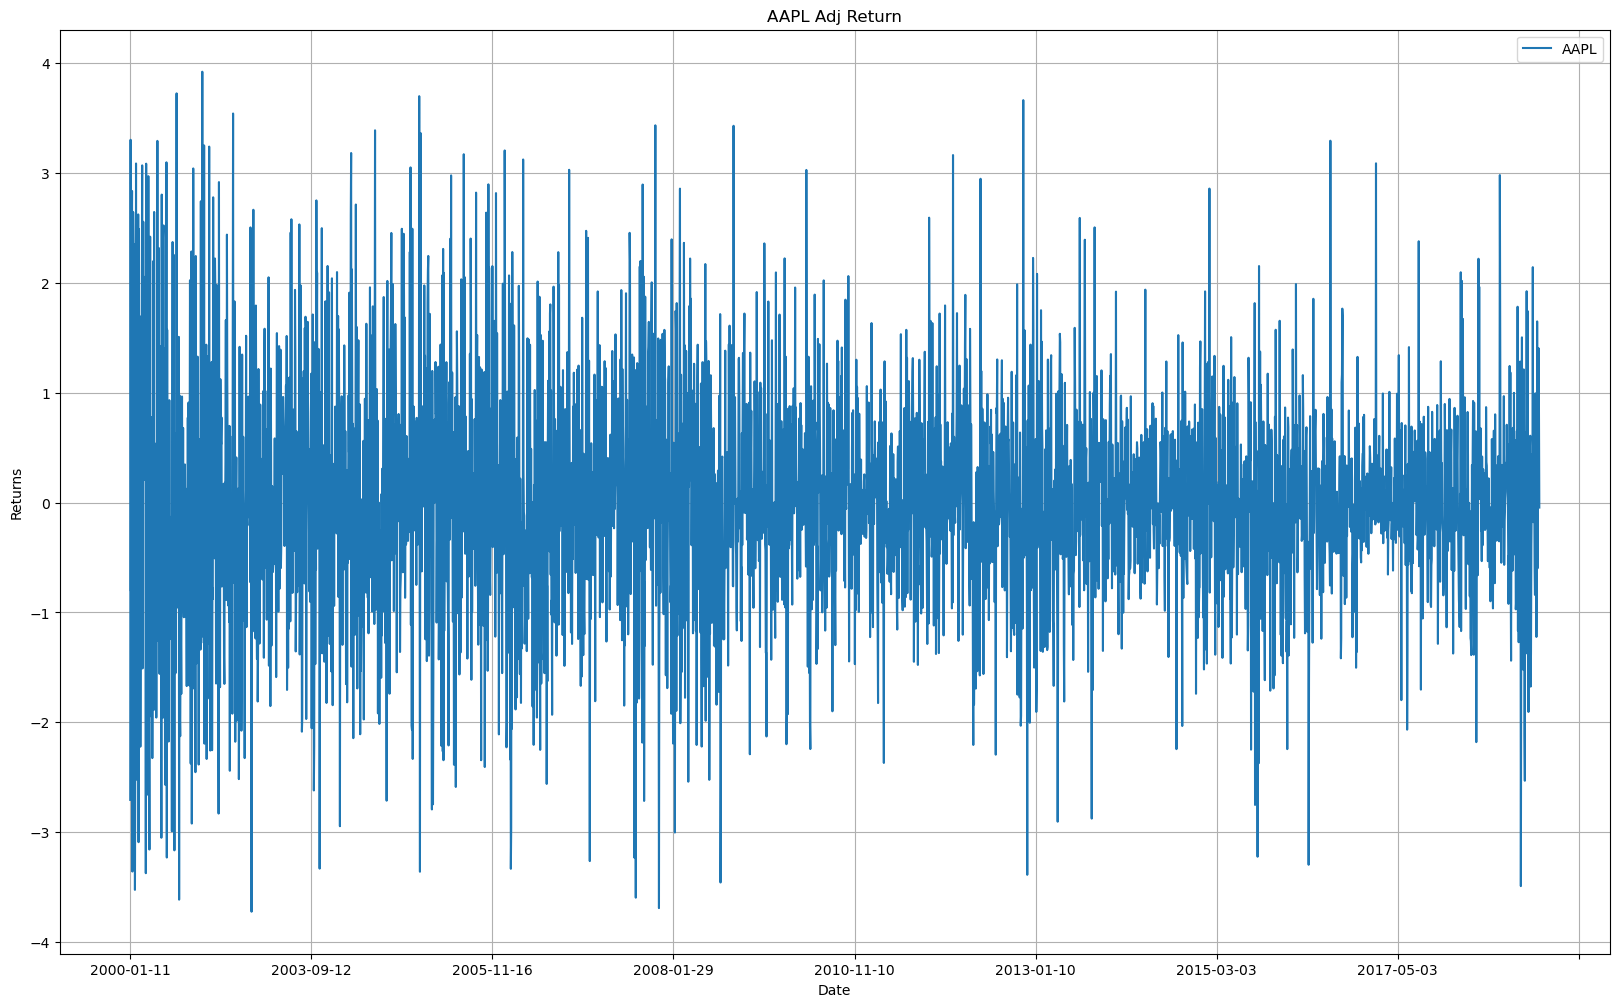

In [20]:
# Visualizing Log Returns for the DJIA 
plt.figure(figsize=(20, 12))
plt.title("AAPL Adj Return")
plt.ylabel("Returns")
rs_df.AAPL.plot()
plt.grid(True);
plt.legend()
plt.show()

### Evaluate algorithm and models

In [21]:
rs_df.shape

(3892, 28)

In [22]:
int(rs_df.shape[0]*0.8)

3113

In [23]:
int(len(rs_df) * 0.8)

3113

In [24]:
percentage=int(rs_df.shape[0]*0.8)

In [25]:
X_train, X_test = rs_df[:percentage], rs_df[percentage:]

In [26]:
X_train_clean, X_test_clean = df_return[:percentage], df_return[percentage:]

In [27]:
stock_ticks = rs_df.columns.values
n_tickers = stock_ticks.shape[0]

### Evaluate model - apply PCA

In [28]:
pca = PCA()
pcomp = pca.fit(X_train)

In [29]:
pca.components_[0] #Eigenvector

array([-0.2278224 , -0.22835766, -0.15302828, -0.18969933, -0.20200012,
       -0.17810558, -0.19508121, -0.16845303, -0.20820442, -0.19308548,
       -0.20879404, -0.20231768, -0.19939638, -0.19521427, -0.16686975,
       -0.22806024, -0.15153408, -0.169941  , -0.19367262, -0.17118841,
       -0.18993347, -0.16805969, -0.197612  , -0.22658993, -0.13821257,
       -0.16688803, -0.16897835, -0.16070821])

,Explained Variance
0,37.03%
1,42.75%
2,47.10%
3,51.08%
4,54.60%
5,57.74%
6,60.65%
7,63.44%
8,66.18%
9,68.71%


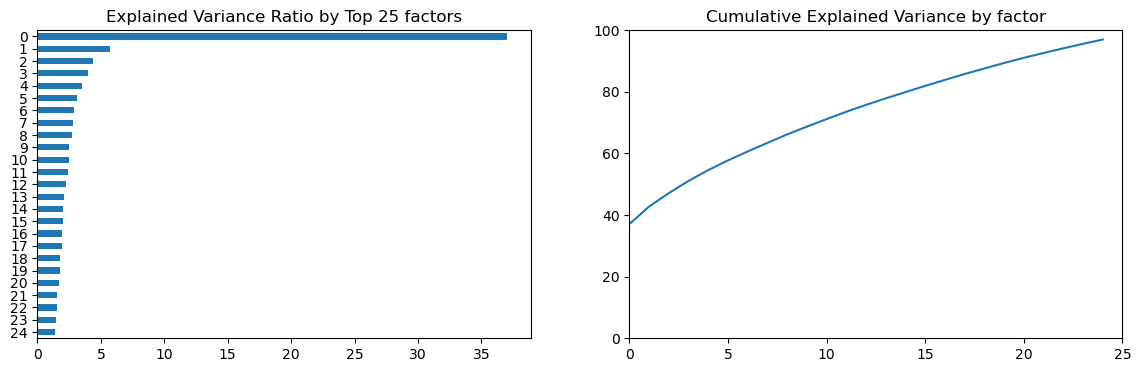

In [30]:
NumEigenvalues=25
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series1.plot.barh(ylim=(0,9), label="woohoo",title='Explained Variance Ratio by Top 25 factors',ax=axes[0]);
Series2.plot(ylim=(0,100),xlim=(0,25),ax=axes[1], title='Cumulative Explained Variance by factor');
# explained_variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance').head(NumEigenvalues).style.format('{:,.2%}'.format)

So... the most important factor (0) can explain about 40% of daily return variance, of the 28 eigenvalues. At around 10 factors, about 70% of the variance is explained in relation to the 28 eigenvalues,... etc

In [31]:
len(pca.components_)

28

In [32]:
sum(pca.components_)

array([-1.20358295,  0.65104886, -1.45244269, -0.73844786, -2.38297158,
       -0.91670752,  1.52280248, -1.96011318,  0.8414016 ,  0.34970594,
       -1.04483352,  0.41610824, -0.02769133, -0.4289911 , -0.83406227,
        0.74826647, -0.19675011,  0.43995977, -0.12709319,  0.91178953,
        0.57786742, -0.96992129,  0.62651403,  0.91604399, -1.86215517,
       -0.42427189, -0.13630285,  0.07060356])

In [33]:
def pcWeights():
    #principal components (pc) weights for each 28 pc
    weights = pd.DataFrame()
    for i in range(len(pca.components_)):
        weights['weights_{}'.format(i)] = pca.components_[i] / sum(pca.components_[i])
    weights = weights.values.T
    return weights

In [34]:
weights = pcWeights()

In [35]:
weights[0]

array([0.04341287, 0.04351486, 0.02916042, 0.0361483 , 0.03849228,
       0.03393904, 0.03717385, 0.03209969, 0.03967455, 0.03679355,
       0.0397869 , 0.0385528 , 0.03799613, 0.0371992 , 0.03179799,
       0.04345819, 0.02887569, 0.03238323, 0.03690543, 0.03262094,
       0.03619291, 0.03202474, 0.0376561 , 0.04317801, 0.0263372 ,
       0.03180147, 0.0321998 , 0.03062387])

In [36]:
sum(pca.components_[0])

-5.247808242068633

so the first pc number is around 5

array([[<AxesSubplot:title={'center':'Portfolio 0'}>],
       [<AxesSubplot:title={'center':'Portfolio 1'}>],
       [<AxesSubplot:title={'center':'Portfolio 2'}>],
       [<AxesSubplot:title={'center':'Portfolio 3'}>],
       [<AxesSubplot:title={'center':'Portfolio 4'}>]], dtype=object)

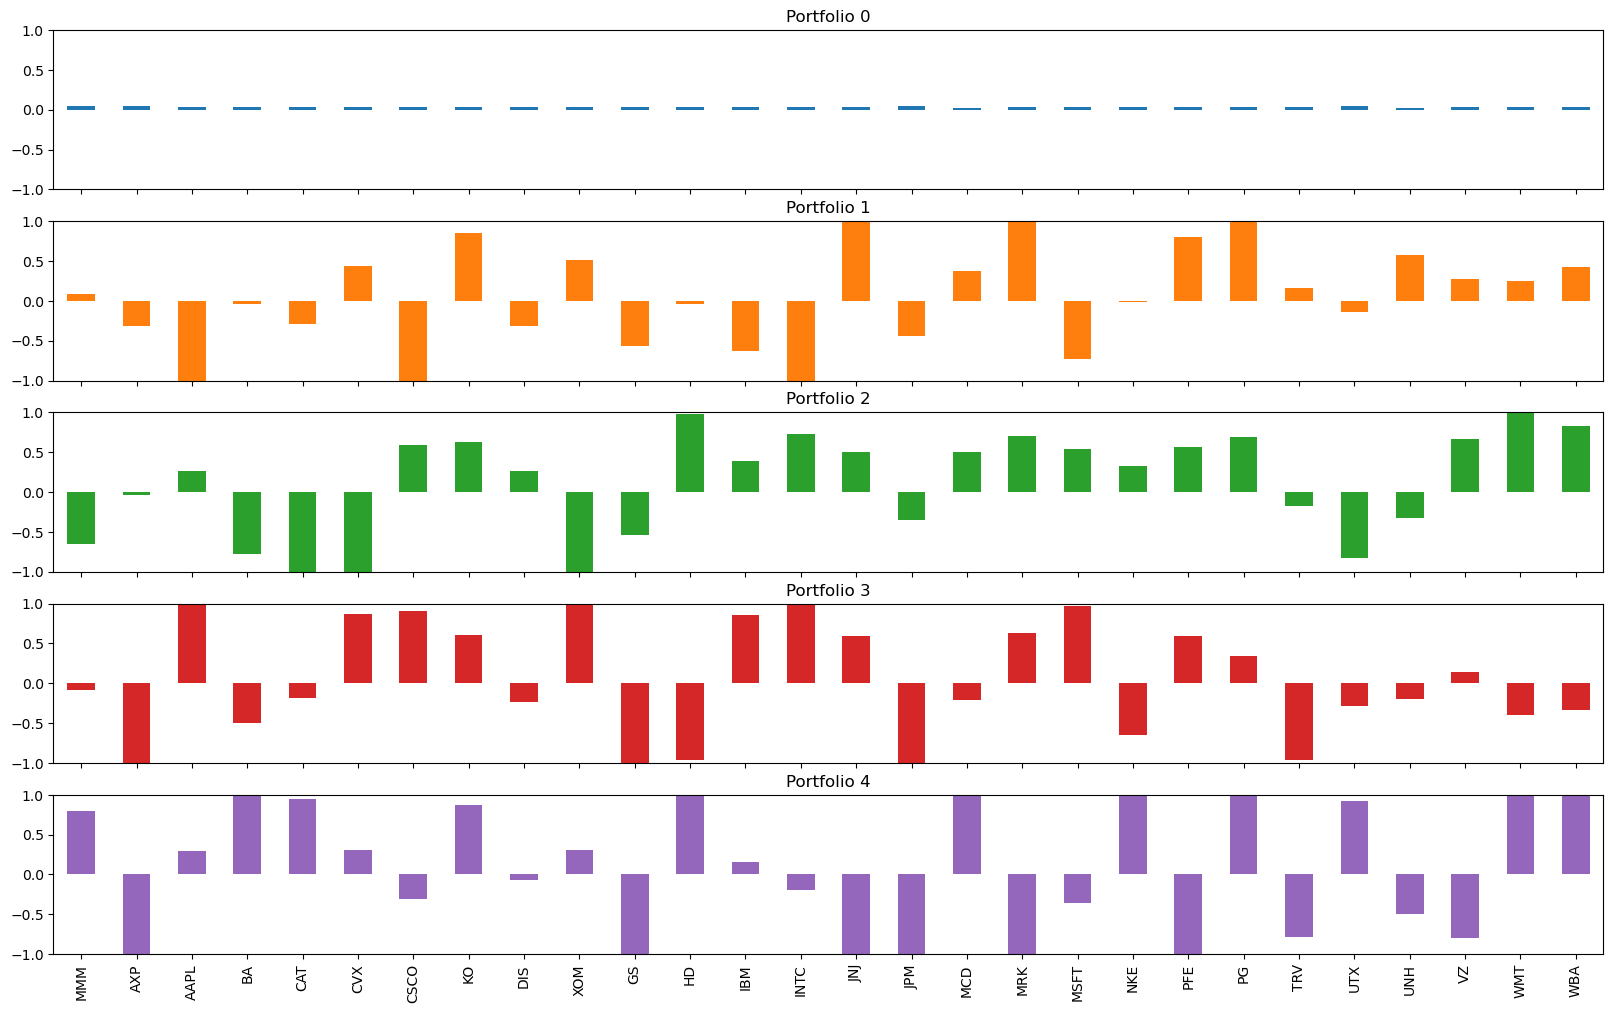

In [37]:
num_comp = 5

top_port = pd.DataFrame(pca.components_[:num_comp], columns=df.columns)
eigen_port = top_port.div(top_port.sum(1), axis=0)
eigen_port.index = [f'Portfolio {i}' for i in range(num_comp)]
eigen_port.T.plot.bar(subplots=True, layout=(int(num_comp),1), figsize=(20,12), legend=False, sharey=True, ylim=(-1,1))

So portfolio 0 explains that the weights are distributed equally and also explains 40% of the variance in the DJIA index... fair representation of the systematic risk factor

Portfolio 1 shows more weights being applied to different sectors above 0... KO, JNJ, MRK,PFE, PG, UNH

Portfolio 3... more weights added on tech companies...

<AxesSubplot:>

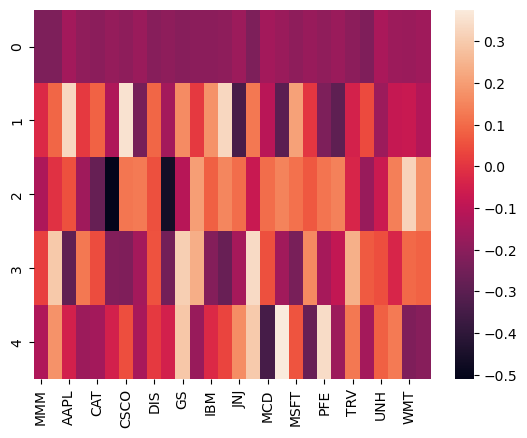

In [38]:
sns.heatmap(top_port)

In [39]:
np.sqrt(pca.explained_variance_)

array([3.31894541, 1.3035757 , 1.13806993, 1.08729966, 1.02336576,
       0.96718281, 0.92963693, 0.91042853, 0.90419182, 0.86629786,
       0.85376639, 0.84253379, 0.81625634, 0.79272349, 0.77663947,
       0.77523614, 0.75856389, 0.75412363, 0.73350953, 0.72636738,
       0.7065402 , 0.68177948, 0.67450419, 0.65630391, 0.64800397,
       0.60658292, 0.56696165, 0.44839966])

In [40]:
eigen_port.index

Index(['Portfolio 0', 'Portfolio 1', 'Portfolio 2', 'Portfolio 3', 'Portfolio 4'], dtype='object')

### Finding the best eigen portfolio

Use Sharpe ratio, which is an assessment of risk-adjusted performance explaining annualized returns against the annualized volatility of a portfolio... high Sharpe ratio means higher returns and/or lower volatility for the specified portfolio

for annualized returns, apply geometric average of all returns in respect to the periods per year (total trading days in a year)

for annualized volatility, you take the standard deviation of the returns and multiply it by the square root of the periods per year

In [41]:
def Sharpe_ratio(ts_returns, trading_days_per_year=252): #total of 252 trading days per year
    n_years = ts_returns.shape[0]/trading_days_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1 # how many ever years from data
    annualized_volatility = ts_returns.std() * np.sqrt(trading_days_per_year)
    annualized_Sharpe = annualized_return/annualized_volatility

    return annualized_return, annualized_volatility, annualized_Sharpe

create loop to compute the pc's weights for EACH eigen portfolio, then use sharpe ratio to look for the portfolio with the highest sharpe ratio. when we find which portfolio has the highest ratio, plot against the DJIA index for visualization

In [42]:
def final_port():
    num_port = len(pca.components_)
    annual_ret = np.array([0.] * num_port)
    sharpe_ratio = np.array([0.] * num_port)
    annual_vol = np.array([0.] * num_port)
    max_sharpe = 0

    stock_tickers = rs_df.columns.values
    # num_ticks = len(stock_tickers)
    principal_comps = pca.components_

    for i in range(num_port):
        pc_weight = principal_comps[i] / sum(principal_comps[i])
        eigen_portfolio = pd.DataFrame(data={'weights': pc_weight.squeeze()*100}, index=stock_tickers)
        eigen_portfolio.sort_values(by=['weights'], ascending=False, inplace=True)

        eigen_portfolio_ret = np.dot(X_train_clean.loc[:,eigen_portfolio.index],pc_weight)
        eigen_portfolio_ret = pd.Series(eigen_portfolio_ret.squeeze(), index=X_train_clean.index)
        ar, av, aS = Sharpe_ratio(eigen_portfolio_ret)
        annual_ret[i] = ar
        annual_vol[i] = av
        sharpe_ratio[i] = aS

        sharpe_ratio = np.nan_to_num(sharpe_ratio)
    max_sharpe = np.argmax(sharpe_ratio)

    print('The best Eigen portfolio is number #%d... The return is %.2f%%, the volatility is %.2f%%, and the Sharpe ratio is %.2f'%
        (max_sharpe,
        annual_ret[max_sharpe]*100,
        annual_vol[max_sharpe]*100, 
        sharpe_ratio[max_sharpe]))
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_ratio, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annual_ret, 'Vol': annual_vol, 'Sharpe': sharpe_ratio})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(20))

    plt.show()

The best Eigen portfolio is number #0... The return is 11.47%, the volatility is 13.31%, and the Sharpe ratio is 0.86
    Return    Vol  Sharpe
0    0.115  0.133   0.862
7    0.096  0.693   0.138
5    0.100  0.845   0.118
1    0.057  0.670   0.084
2   -0.107  0.859  -0.124
11  -1.000  7.228  -0.138
13  -0.399  2.070  -0.193
25  -1.000  5.009  -0.200
23  -1.000  4.955  -0.202
6   -0.416  1.967  -0.212
10  -0.158  0.738  -0.213
3   -0.162  0.738  -0.220
26  -1.000  4.535  -0.220
8   -0.422  1.397  -0.302
17  -0.998  3.277  -0.305
24  -0.550  1.729  -0.318
16  -0.980  3.038  -0.323
21  -0.470  1.420  -0.331
14  -0.886  2.571  -0.345
27  -0.933  2.606  -0.358


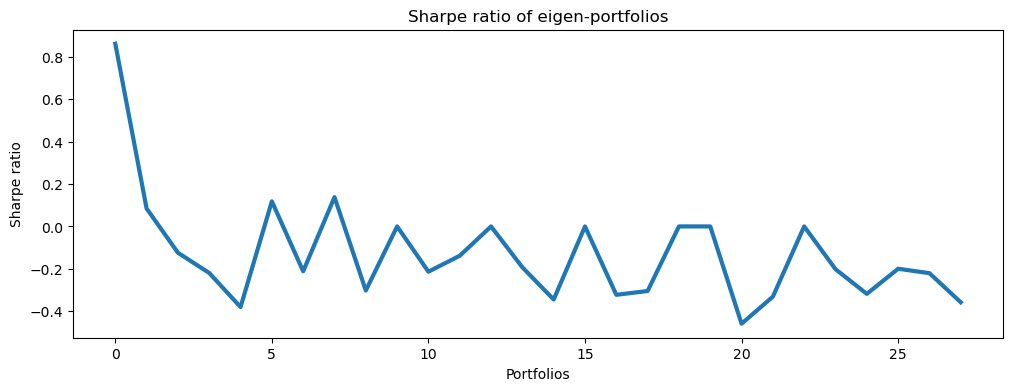

In [43]:
final_port()

Portfolio 0 is the best performing with highest return and lowest volatility

Viewing the composition of Portfolio 0... we plot the Eigen

In [44]:
WEIGHTS = pcWeights()
portfolio = pd.DataFrame()

In [45]:
def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_ticks) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights', 
            figsize=(12,6), 
            xticks=range(0, len(stock_ticks),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()


    return portfolio

Sum of weights of current eigen-portfolio: 100.00


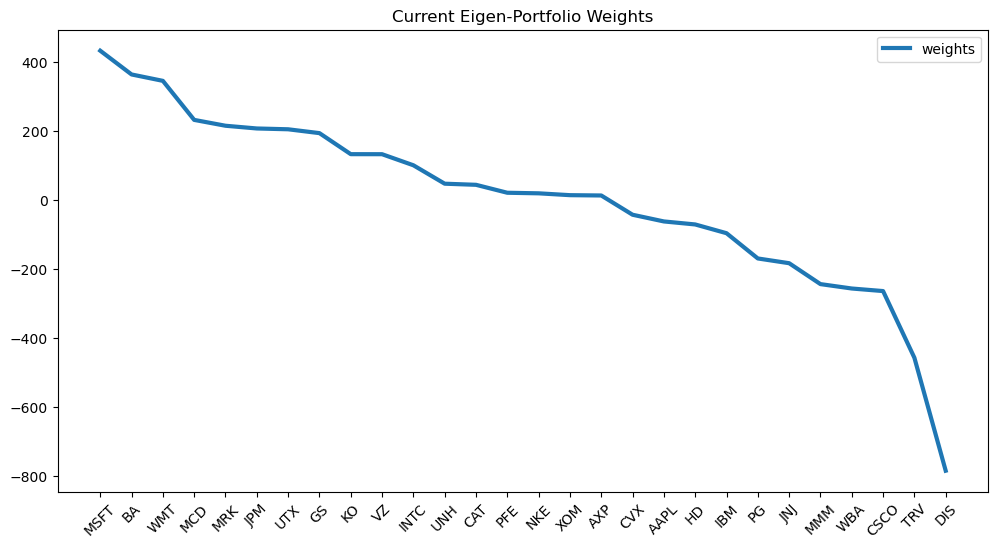

,weights
MSFT,433.221
BA,364.385
WMT,345.832
MCD,232.628
MRK,215.673
JPM,207.750
UTX,205.404
GS,194.264
KO,133.268
VZ,133.145


In [46]:
plotEigen(weights=weights[14], plot=True)

Weights seemed to be higher than average in finance sector... range is between 2.5 to 4.2... this portfolio explains 40% of the variance and represents the systematic risk factor

### Backtesting other Eigen portfolios

In [47]:
def Backtest(eigen):
    '''Plots Principle components returns against real returns.'''
    eigen_prtfi = pd.DataFrame(data ={'weights': eigen.squeeze()}, index = stock_ticks)
    eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)    

    eigen_prti_returns = np.dot(X_test_clean.loc[:, eigen_prtfi.index], eigen)
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test_clean.index)
    returns, vol, sharpe = Sharpe_ratio(eigen_portfolio_returns)  
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    equal_weight_return=(X_test_clean * (1/len(pca.components_))).sum(axis=1)    
    df_plot = pd.DataFrame({'EigenPorfolio Return': eigen_portfolio_returns, 'Equal Weight Index': equal_weight_return}, index=X_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the equal weighted index vs. eigen-portfolio' , 
                          figsize=(12,6), linewidth=3)
    plt.show()

The best Eigen portfolio is number #0... The return is 11.47%, the volatility is 13.31%, and the Sharpe ratio is 0.86
    Return    Vol  Sharpe
0    0.115  0.133   0.862
7    0.096  0.693   0.138
5    0.100  0.845   0.118
1    0.057  0.670   0.084
2   -0.107  0.859  -0.124
11  -1.000  7.228  -0.138
13  -0.399  2.070  -0.193
25  -1.000  5.009  -0.200
23  -1.000  4.955  -0.202
6   -0.416  1.967  -0.212
10  -0.158  0.738  -0.213
3   -0.162  0.738  -0.220
26  -1.000  4.535  -0.220
8   -0.422  1.397  -0.302
17  -0.998  3.277  -0.305
24  -0.550  1.729  -0.318
16  -0.980  3.038  -0.323
21  -0.470  1.420  -0.331
14  -0.886  2.571  -0.345
27  -0.933  2.606  -0.358


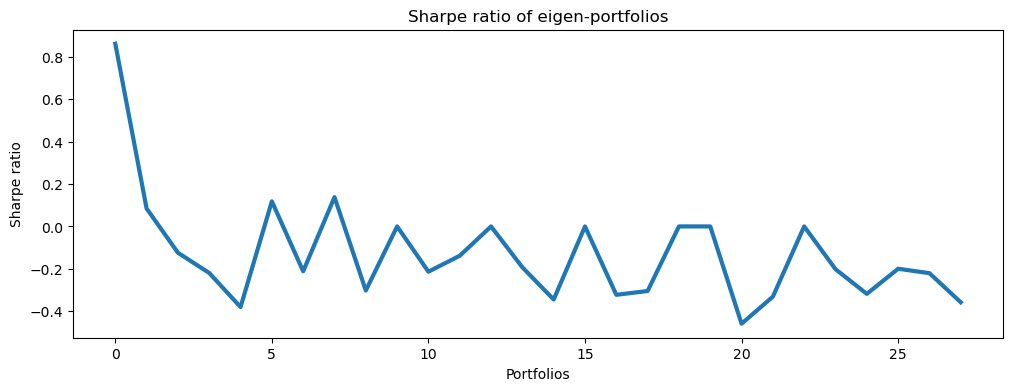

In [48]:
final_port()

Current Eigen-Portfolio:
Return = 23.20%
Volatility = 11.27%
Sharpe = 2.06


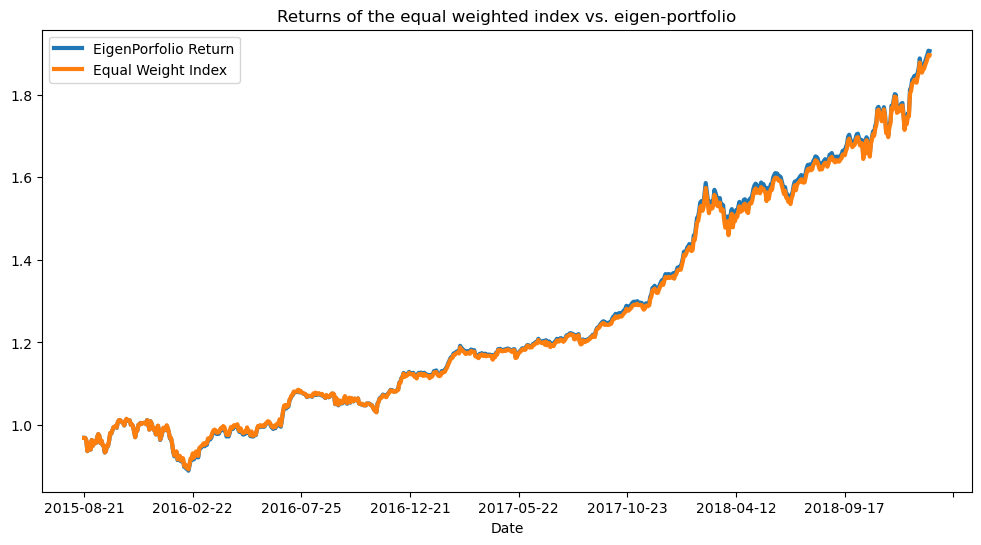

In [49]:
Backtest(eigen=weights[0])

Current Eigen-Portfolio:
Return = 32.76%
Volatility = 68.64%
Sharpe = 0.48


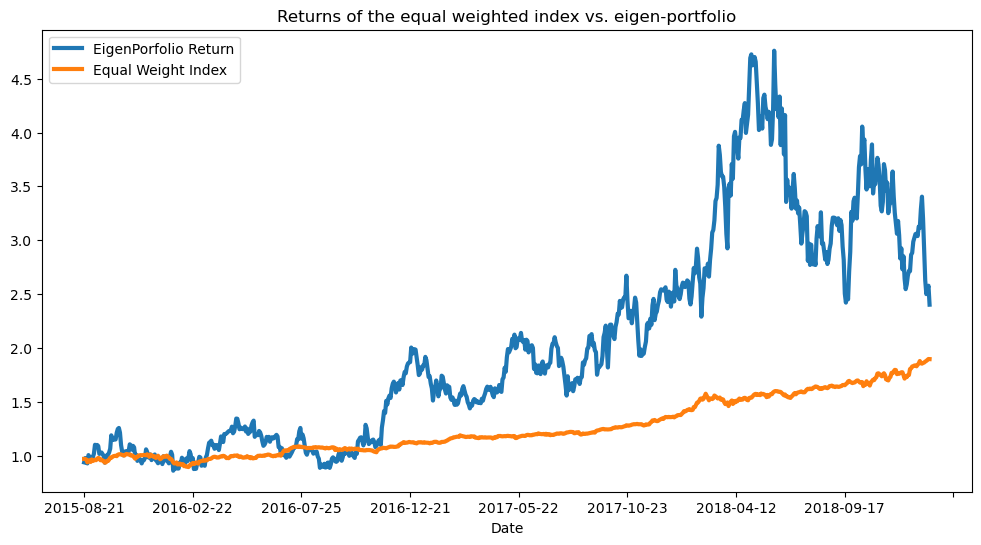

In [50]:
Backtest(eigen=weights[5])

Current Eigen-Portfolio:
Return = -17.77%
Volatility = 53.47%
Sharpe = -0.33


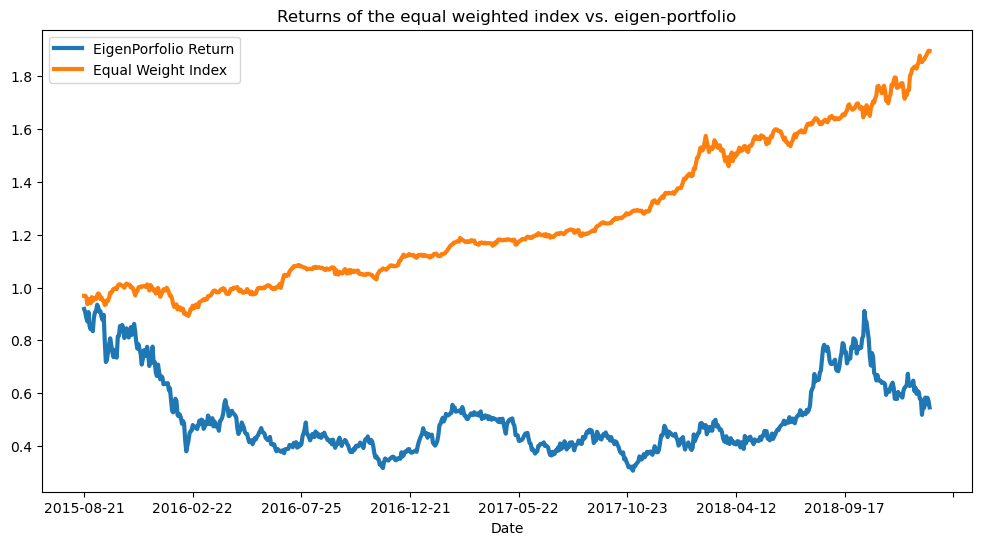

In [51]:
Backtest(eigen=weights[7]) 

Current Eigen-Portfolio:
Return = 99.80%
Volatility = 58.34%
Sharpe = 1.71


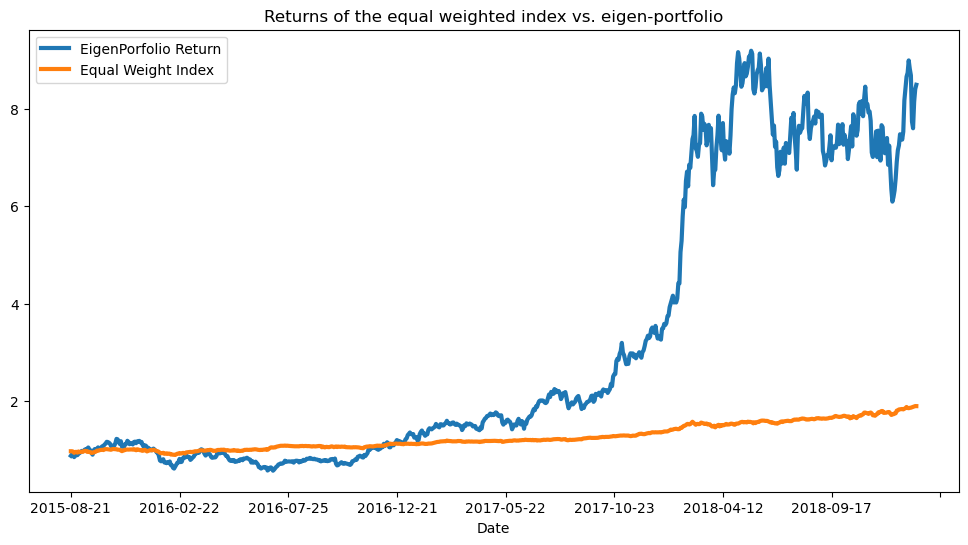

In [53]:
Backtest(eigen=weights[1])

portfolio 1 had lots of weights on the healthcare sector... after 2017, it flourished while being volatile...A really high Sharpe ratio with good returns

Current Eigen-Portfolio:
Return = -79.42%
Volatility = 185.30%
Sharpe = -0.43


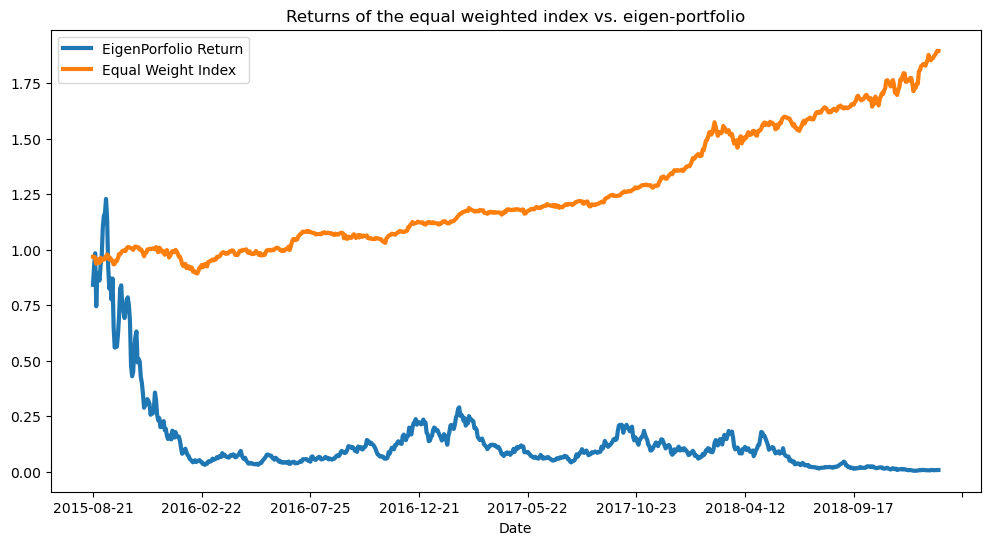

In [52]:
Backtest(eigen=weights[14])

low Sharpe rate portfolio won't give us any information like the one shown above... doesn't show the overall stability of the returns/volatility ratio... Only look for high sharpe value and look at the return gains against volatility

The intuition behind eigen portfolio is that portfolio 0 represents the systemic risk factor and the other eigen portfolio may represent sector or industry factor. The diversification benefits from the eigen portfolio were derived using PCA and independent from each other... 

with the backtesting result, the portfolio with the best result in the training set leads to the best result in the test set. With PCA, we can get independent eigen portfolio with high sharpe ratio and high return, much like the stock market